In [107]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import seaborn as sns

In [108]:
data = pd.read_csv(r'c:\Users\sravan\Downloads\Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [109]:
print(data.shape)

(200, 5)


In [110]:
x = []
for i in data.columns:
    if data[i].dtype == "object":
        x.append(i)
print(data[x].head())

   Gender
0    Male
1    Male
2  Female
3  Female
4  Female


In [111]:
y = data.pop('CustomerID')

In [112]:
le = LabelEncoder()
for col in data:
    data[col] = le.fit_transform(data[col])

In [113]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,0,30
1,1,3,0,67
2,0,2,1,4
3,0,5,1,64
4,0,13,2,31


In [114]:
data.pop('Gender')

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int32

In [115]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,30
1,3,0,67
2,2,1,4
3,5,1,64
4,13,2,31


In [116]:
train = data.head(160)
len(train)
test = data.tail(40)
len(test)

40

In [117]:
print(len(train))
print(len(test))


160
40


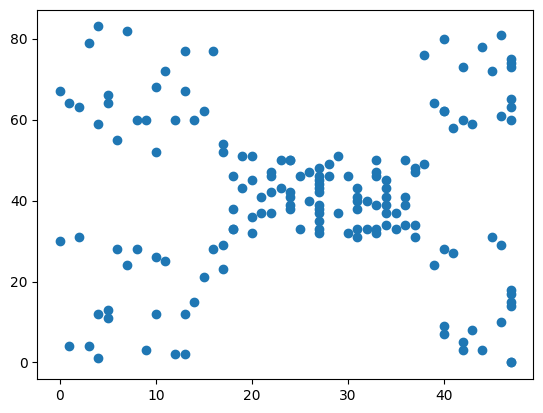

In [118]:
x = plt.scatter(train['Annual Income (k$)'], train['Spending Score (1-100)'])
plt.show()

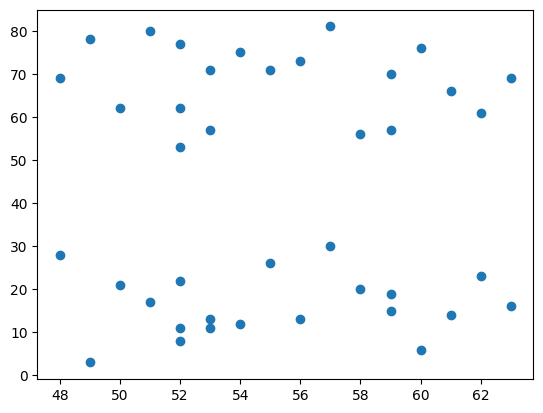

In [119]:
x = plt.scatter(test['Annual Income (k$)'], test['Spending Score (1-100)'])
plt.show()

In [120]:
iner = []
k = 10
for i in range(1, k+1):
    model = KMeans(n_clusters=i, random_state=1)
    model.fit(train)
    iner.append(model.inertia_)
print(iner)

[127880.13749999998, 79273.5780051151, 61801.88851974898, 52016.36578873593, 37111.068046862856, 25291.022807017544, 22355.86017158885, 21386.03891868121, 18532.750713940342, 16645.748722598353]


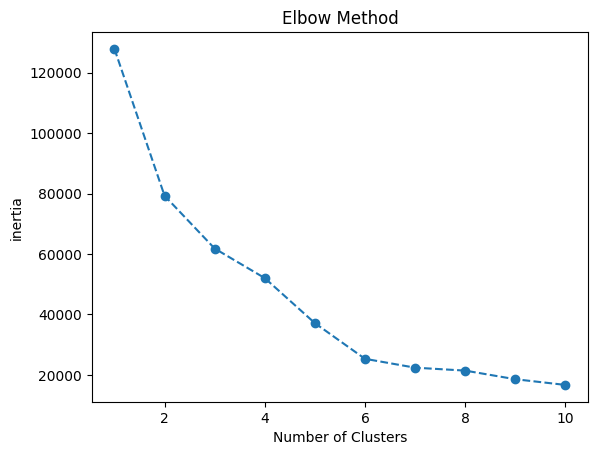

In [121]:
plt.plot(range(1, k+1), iner, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.title('Elbow Method')
plt.show()

In [122]:
k = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=1)
    model.fit(train)
    labels = model.labels_
    k.append(silhouette_score(train, labels))
k

[0.339281550685858,
 0.31415153544482705,
 0.345804432937831,
 0.4052879015706061,
 0.4519676626725223,
 0.4065157785361052,
 0.4072135616419981,
 0.38279032266899926]

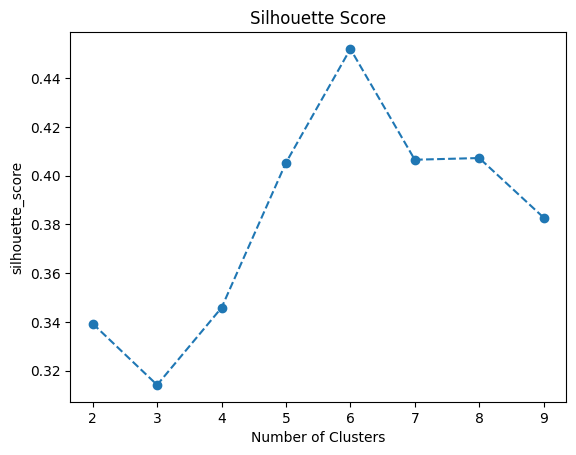

In [123]:
plt.plot(range(2,10), k, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette_score')
plt.title('Silhouette Score')
plt.show()

In [124]:
k = 6
model = KMeans(n_clusters=k, random_state=1)
model.fit(train)

KMeans(n_clusters=6, random_state=1)

In [129]:
y_kmeans = model.fit_predict(train)
y_kmeans

array([5, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 5,
       1, 2, 0, 5, 5, 5, 0, 5, 5, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 5,
       0, 0, 5, 5, 0, 0, 0, 0, 0, 5, 0, 5, 5, 0, 0, 5, 0, 0, 5, 0, 0, 5,
       5, 0, 0, 5, 0, 5, 5, 5, 0, 5, 0, 5, 5, 0, 0, 5, 0, 5, 0, 0, 0, 0,
       0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 5, 4, 5, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3])